In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) El ciclo de actividad solar

In [2]:
file="https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
data=pd.read_csv(file,delim_whitespace=True,skiprows=1)
data["date"] = pd.to_datetime(data[["Year","Month","Day"]])

In [3]:
f=(data['Year']== 2012) & (data['Month']== 1) & (data['Day'] == 1)
indice=int(data.index[f][0])
indice+=1

In [4]:
data=data.iloc[:indice]

## 1.1) Período del ciclo solar

In [7]:
datos=data['SSN'].to_numpy()
media_datos=np.mean(datos)
datos-=media_datos

In [8]:
Transformada=np.fft.fft(datos)
frecuencias=np.fft.fftfreq(len(Transformada),1.0)
indice_max=np.argmax(Transformada[0:len(Transformada)//2])
f_principal=frecuencias[indice_max]
f_principal ##[f_p]=ciclos por dia

0.0002451781627983001

In [9]:
periodo=(1/f_principal)/365.15 #Periodo en años
periodo

11.169838878999498

El periodo del ciclo de actividad solar es 11.17 años

## 1.2) Reducción de ruido: filtro pasabajas

In [12]:
def filtro(f,alpha):
    return np.exp(-(f*alpha)**2)

### Punto 1.2 a

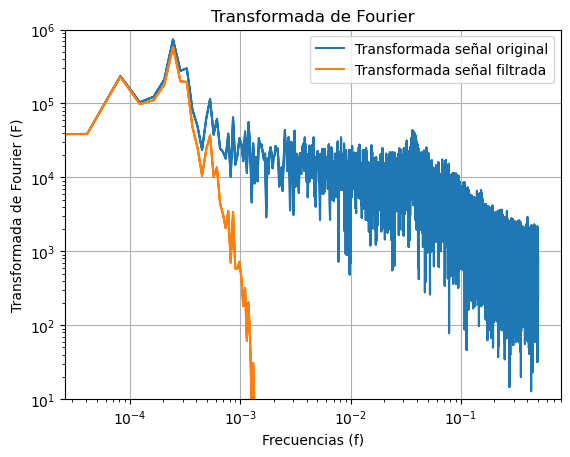

In [13]:
plt.plot(np.abs(frecuencias),np.abs(Transformada),label="Transformada señal original")
plt.plot(np.abs(frecuencias),np.abs(Transformada*filtro(frecuencias,2e3)),label="Transformada señal filtrada")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frecuencias (f)")
plt.ylabel("Transformada de Fourier (F)")
plt.ylim(1e1,1e6)
plt.title("Transformada de Fourier")
plt.legend()
plt.grid()

### Punto 1.2 b

In [15]:
t=data['date']
inversa_original=np.fft.ifft(Transformada).real
inversa_original+=media_datos
señal_filtrada=np.fft.ifft(Transformada*filtro(frecuencias,2e3)).real
señal_filtrada+=media_datos

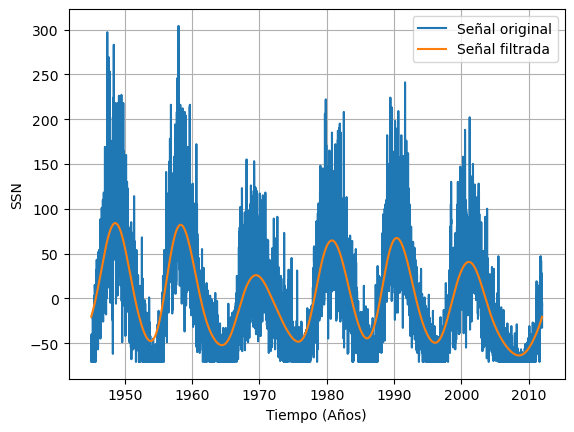

In [16]:
plt.plot(t,inversa_original,label="Señal original")
plt.plot(t,señal_filtrada,label="Señal filtrada")
plt.legend()
plt.xlabel("Tiempo (Años)")
plt.ylabel("SSN")
plt.grid()

## 1.3 EXTRAPOLACION de funciones (más o menos) periódicas

In [17]:
import datetime as dt
n=10
f_k=np.concatenate((frecuencias[:n],frecuencias[-n:]))
F_k=np.concatenate((Transformada[:n],Transformada[-n:]))
fecha_inicio=dt.date(int(data["Year"][0]),int(data["Month"][0]),int(data["Day"][0]))
fecha_futura=dt.date(2045,1,1)
tiempo=pd.date_range(fecha_inicio,fecha_futura,freq="D")
tiempo

DatetimeIndex(['1945-01-01', '1945-01-02', '1945-01-03', '1945-01-04',
               '1945-01-05', '1945-01-06', '1945-01-07', '1945-01-08',
               '1945-01-09', '1945-01-10',
               ...
               '2044-12-23', '2044-12-24', '2044-12-25', '2044-12-26',
               '2044-12-27', '2044-12-28', '2044-12-29', '2044-12-30',
               '2044-12-31', '2045-01-01'],
              dtype='datetime64[ns]', length=36526, freq='D')

In [18]:
def inversa_transformada(F,f,t):
    N=len(tiempo)
    signal=np.zeros(N,dtype=complex)
    for j in range(N):
        signal[j]=(1/N)*np.sum(F*np.exp(2*np.pi*1j*f*j))
    return signal
inversa_extrapolada=inversa_transformada(F_k,f_k,tiempo)
real_inversa_extrapolada=(inversa_extrapolada).real+media_datos

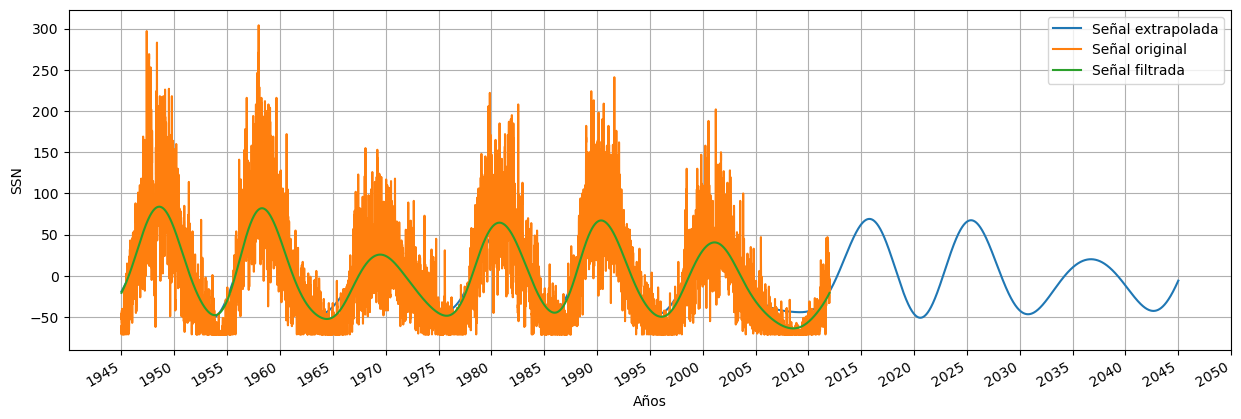

In [19]:
import matplotlib.dates as mdates

plt.figure(figsize=(15,5))
plt.plot(tiempo,real_inversa_extrapolada,label="Señal extrapolada")
plt.plot(data["date"],inversa_original,label="Señal original")
plt.plot(data["date"],señal_filtrada,label="Señal filtrada")
plt.ylabel("SSN")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gcf().autofmt_xdate()
plt.xlabel("Años")
plt.legend()
plt.grid()

$\textbf{Nos encontramos en la fase de ascenso}$

In [26]:
## #Manchas solares A mitad de agosto
fecha="2024-08-15"
ind_año=np.where(tiempo==fecha)[0]
manchas_solares=real_inversa_extrapolada[ind_año][0]
manchas_solares

131.60136731849704

Se espera aproximadamente $131.60$ manchas solares a mitad de agosto

# 2) Transformada 2D

In [27]:
from PIL import Image
img  = np.array(Image.open("Noisy_Smithsonian_Castle.jpg")).astype(float)

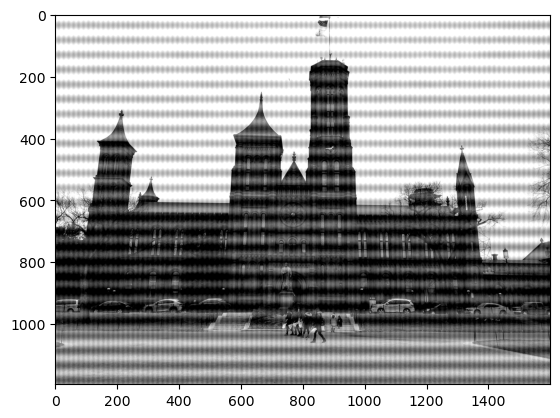

In [28]:
plt.imshow(img,cmap='gray')

### Punto 2.1

In [29]:
Transformada_2D=np.fft.fft2(img)
Transformada_2D=np.fft.fftshift(Transformada_2D)

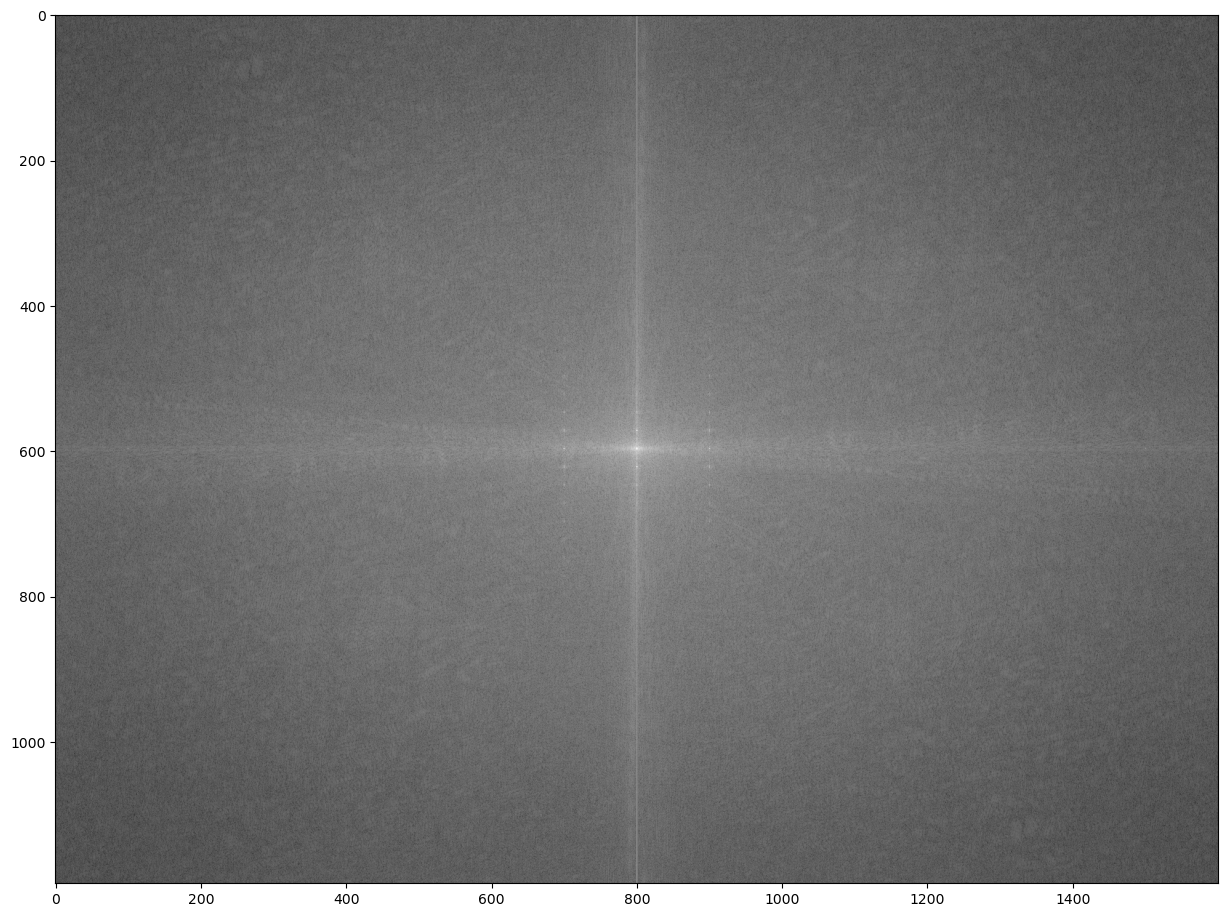

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(abs(Transformada_2D),cmap='gray',norm='log')

In [31]:
Transformada_2D[400:800,697:710]=1
Transformada_2D[400:800,895:910]=1
Transformada_2D[0:590,800:810]=1
Transformada_2D[610:1400,800:810]=1
Transformada_2D[600:610,0:710]=1
Transformada_2D[600:610,895:1500]=1

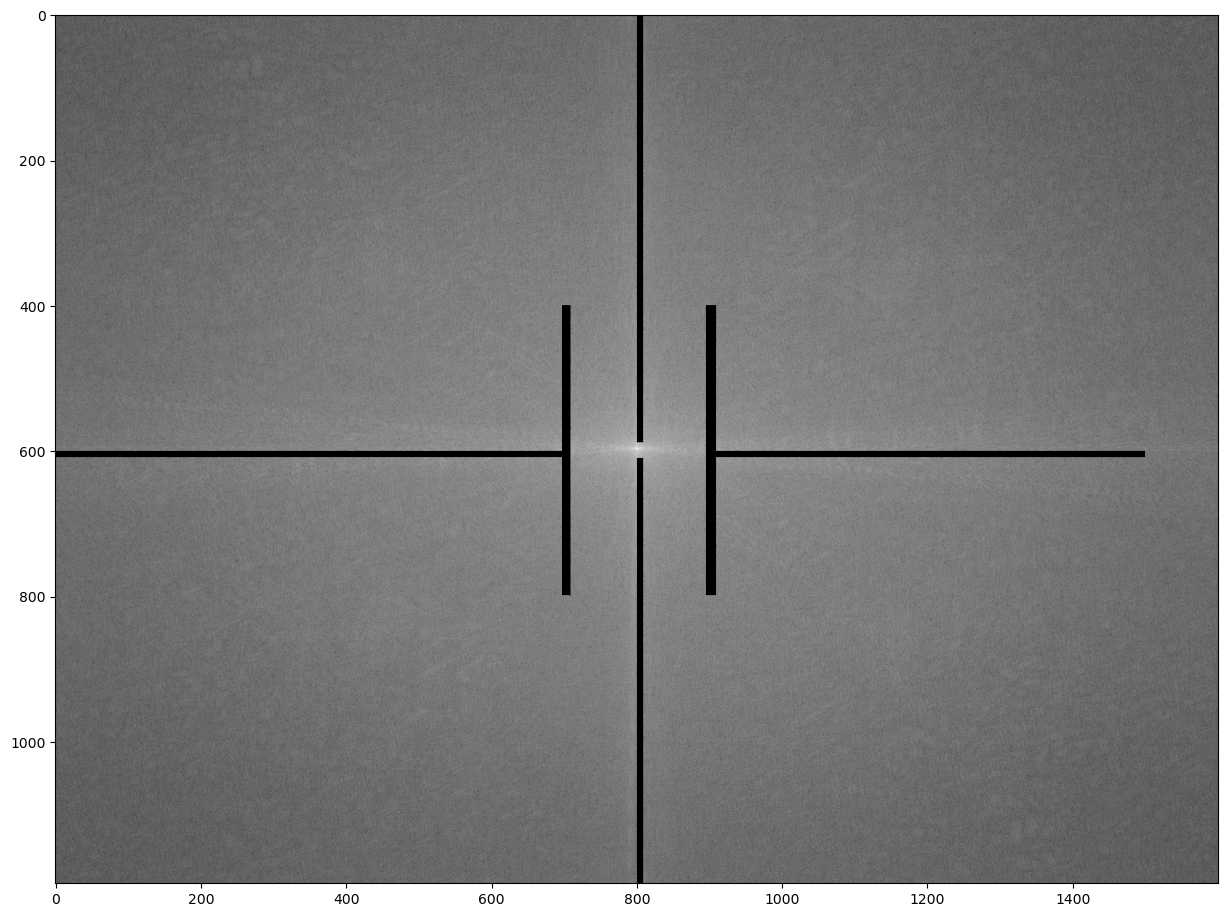

In [32]:
## Verificar borrado
plt.figure(figsize=(15,15))
plt.imshow(abs(Transformada_2D),cmap='gray',norm='log')

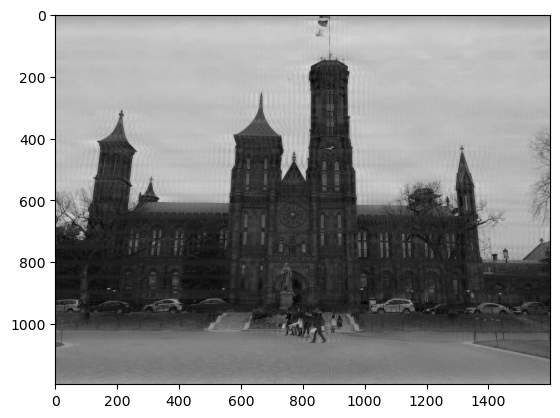

In [33]:
## Imagen sin ruido
Transformada_2D=np.fft.ifftshift(Transformada_2D)
inversa_T=np.fft.ifft2(Transformada_2D)
plt.imshow(abs(inversa_T),cmap='gray')